# Predicting Tips for NYC Yellow Taxi Rides - Follow Up 1

In my intial upload, I mentioned waiting for the TLC to release data on the following months to test our model on future data. In this notebook I took this approach but with previous months, specifically April, May, and June of 2019.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time as t

In [2]:
taxi = pd.read_csv('yellow_tripdata_2019-04.csv')
taxi_1 = pd.read_csv('yellow_tripdata_2019-05.csv')
taxi_2 = pd.read_csv('yellow_tripdata_2019-06.csv')
zone = pd.read_csv('taxi+_zone_lookup.csv')
taxi_test = taxi.copy()

In [3]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-04-01 00:04:09,2019-04-01 00:06:35,1,0.5,1,N,239,239,1,4.0,3.0,0.5,1.00,0.0,0.3,8.80,2.5
1,1,2019-04-01 00:22:45,2019-04-01 00:25:43,1,0.7,1,N,230,100,2,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
2,1,2019-04-01 00:39:48,2019-04-01 01:19:39,1,10.9,1,N,68,127,1,36.0,3.0,0.5,7.95,0.0,0.3,47.75,2.5
3,1,2019-04-01 00:35:32,2019-04-01 00:37:11,1,0.2,1,N,68,68,2,3.5,3.0,0.5,0.00,0.0,0.3,7.30,2.5
4,1,2019-04-01 00:44:05,2019-04-01 00:57:58,1,4.8,1,N,50,42,1,15.5,3.0,0.5,3.85,0.0,0.3,23.15,2.5


In [4]:
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06,7.433139e+06
mean,1.636259e+00,1.573301e+00,2.998019e+00,1.057416e+00,1.633672e+02,1.615346e+02,1.288608e+00,1.319433e+01,1.212602e+00,4.957358e-01,2.212688e+00,3.821195e-01,2.988961e-01,1.922981e+01,2.291299e+00
std,5.071082e-01,1.224597e+00,3.908213e+00,7.037535e-01,6.615664e+01,7.037945e+01,4.761804e-01,1.457199e+02,1.288626e+00,5.482860e-02,2.772410e+00,1.718031e+00,2.486543e-02,1.459684e+02,7.017208e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500800e+02,-2.460000e+01,-5.000000e-01,-8.800000e+01,-2.300000e+01,-3.000000e-01,-4.508800e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.160000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.640000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.476000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.050000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.075000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,8.309000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.958399e+05,2.000000e+01,2.745000e+01,4.408000e+02,8.125900e+02,1.000000e+00,3.958412e+05,2.750000e+00


In [5]:
from sklearn.preprocessing import MinMaxScaler

def convert_to_timestamp(x):
    for i in x:
        t.mktime(i.timetuple())
    return x
def normalize(df):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(df)
    return dates_scaled

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

In [7]:
class NormalTime(BaseEstimator,TransformerMixin):
    def __init__(self, _time=True):
        self._time = _time
        
    def present(self,x):
        updated = x.str.starts_with('2019-')
        return updated
    
    def fit(self,x,y=None):
        return self
        
    def transform(self,x,y=None):
        df = pd.DataFrame(x)
        if self._time:
            y = pd.to_datetime(df.stack()).unstack()
            y = pd.DataFrame(y)
            y = y.apply(convert_to_timestamp)
            i = normalize(y)
            return i
    
        

In [8]:
class NumsOnly(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        x = x.drop(columns='store_and_fwd_flag')
        return x

In [9]:
from sklearn.compose import ColumnTransformer

pipeline = ColumnTransformer([
    ('time',NormalTime(),[1,2]),('flag',NumsOnly(),[6])],remainder='passthrough') 

In [10]:
taxi = taxi[taxi['tip_amount']>=0]
taxi = taxi[taxi['total_amount']>=0]
taxi_1 = taxi_1[taxi_1['tip_amount']>=0]
taxi_1 = taxi_1[taxi_1['total_amount']>=0]
taxi_2 = taxi_2[taxi_2['tip_amount']>=0]
taxi_2 = taxi_2[taxi_2['total_amount']>=0]

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(taxi, train_size=.6,test_size=.2,random_state=42)

In [12]:
train_label = train_set.iloc[:,13]
train_set_ = train_set.drop(columns= 'tip_amount')

In [13]:
taxi_1_label = taxi_1.iloc[:,13]
taxi_1_test = taxi_1.drop(columns='tip_amount')
taxi_2_label = taxi_2.iloc[:,13]
taxi_2_test = taxi_2.drop(columns='tip_amount')

For this upload, I specifically chose to not split the data for May and June to simulate what an implimented version would look like. Meaning the model is behaving as if it were trained in April, and taking in the new data at random.

In [14]:
prepared = pipeline.fit_transform(train_set_)
prepared_1 = pipeline.fit_transform(taxi_1_test)
prepared_2 = pipeline.fit_transform(taxi_2_test)

/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Model Selection

In [15]:
from sklearn import tree

In [16]:
tr = tree.DecisionTreeRegressor(random_state=42)

In [17]:
reg = tr.fit(prepared,train_label)

In [18]:
test_label = test_set.iloc[:,13]
new_test = test_set.drop(columns ='tip_amount')

In [19]:
new_prepared = pipeline.fit_transform(new_test)

/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
predictions = reg.predict(new_prepared)

In [21]:
predictions_1 = reg.predict(prepared_1)

In [22]:
predictions_2 = reg.predict(prepared_2)

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [24]:
April = mse(test_label,predictions)

In [26]:
May = mse(taxi_1_label,predictions_1)

In [27]:
June = mse(taxi_2_label,predictions_2)

In [54]:
print('April: '+ str(np.sqrt(April)))
print('May: '+ str(np.sqrt(May)))
print('June: '+ str(np.sqrt(June)))

April: 0.30617150003677646
May: 0.34108081119815975
June: 0.7233588346133916


So the rmse more than doubles from May to June. Let's visualize these scores to get a better understanding of the results.

In [55]:
April_score = pd.DataFrame(predictions,test_label)
May_score = pd.DataFrame(predictions_1,taxi_1_label)
June_score = pd.DataFrame(predictions_2,taxi_2_label)

df = [April_score,May_score,June_score]
scores = pd.concat(df,axis=0)

In [56]:
scores['Label'] = scores.index

In [57]:
scores = scores.reset_index(drop=True)

In [58]:
cols = ['Predictions','Label']
scores.columns = cols

In [59]:
scores = scores.round(decimals=2)
scores

,Predictions,Label
0,5.06,5.06
1,0.00,0.00
2,0.00,0.00
3,3.99,3.99
4,2.25,2.25
...,...,...
15962849,2.00,2.00
15962850,0.00,0.00
15962851,1.45,1.45
15962852,2.26,2.26


In [60]:
scores['correct'] = scores['Label'] == scores['Predictions']

As in the previous upload, I'm setting a y limit so that we can see the data that matters.

(-5, 20)

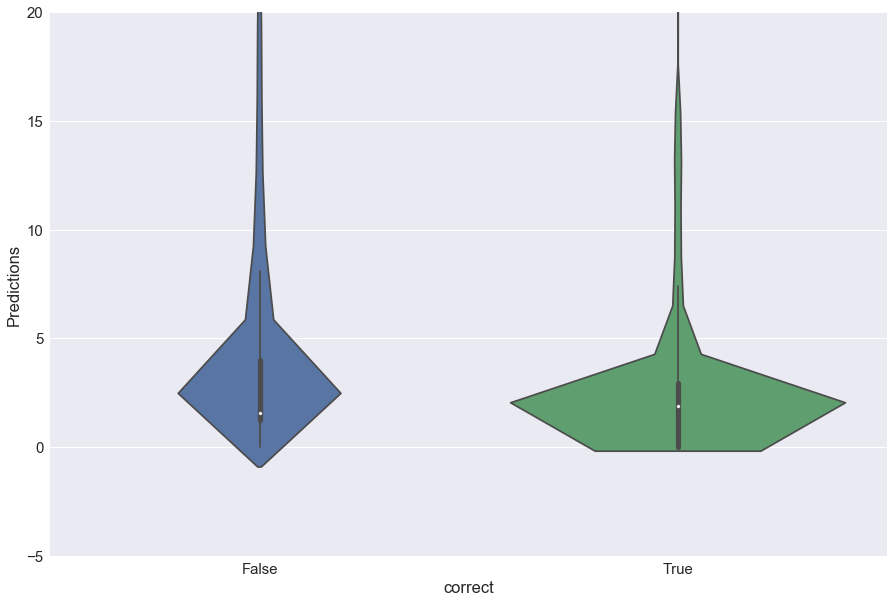

In [61]:
sns.set(rc={'figure.figsize':(15,10)},font_scale=1.5)
sns.violinplot(x='correct',y='Predictions',data=scores, inner="box")
plt.ylim(-5,20)

In [62]:
wrong = scores[scores['correct']==False]

,Predictions,Label
count,597115.000000,597115.000000
mean,3.922046,4.277722
std,6.544262,6.910674
min,0.000000,0.000000
25%,1.250000,1.760000
50%,1.580000,2.460000
75%,4.000000,3.990000
max,333.200000,1624.640000


In [64]:
x = wrong.describe()
y = x['Predictions'] - x['Label']
y

count       0.000000
mean       -0.355677
std        -0.366412
min         0.000000
25%        -0.510000
50%        -0.880000
75%         0.010000
max     -1291.440000
dtype: float64

So the predictions fall below the Lablel. This isn't worst case considering we're predicting a random amount like tip, and going over would give us false expectations. With the predictions below (on average) by 35 cents, we're at least near the dollar amount we want. 

To deploy this model, it would be best to use it's refit method to cope with incoming data creating someting of a 'rolling' data set. This would allow us to have a set of one months time continously fitted to keep up preformance.